<a href="https://colab.research.google.com/github/dssalim/Topicos_SI_IA/blob/main/Atividade_SI_Estatistica_LLMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDADE FEDERAL DO PARÁ**

**INSTITUTO DE CIÊNCIAS EXATAS E NATURAIS**

**FACULDADE DE COMPUTAÇÃO**

**ESTATÍSTICA E LLMs**

**DOCENTE: CLAUDOMIRO DE SOUZA DE SALES JUNIOR**

**DISCENTE: SALOMÃO SALIM**

# Introdução


Carregando bibliotecas

In [201]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


Fonte de dados: https://dadosabertos.ibama.gov.br/dataset/volumes-explorados-if-100/resource/ac345e77-863b-472c-a06a-4f171263bc70

In [33]:
#Carregando dados

dados = pd.read_csv(
    'VolumeExpIF100_ano_2025.csv',
    sep=';',
    encoding='latin-1',
    decimal=',',
    engine='python',
    on_bad_lines='skip'
)

In [34]:
#Checando os dados carregados

dados.head()




,NRO_REGISTRO,NRO_AUTORIZACAO,DATA_DE_EMISSAO,DATA_DE_VALIDADE,UF,MUNICIPIO,NOME_DETENTOR,CPF_CNPJ_DETENTOR,ATIVIDADE,PRODUTO,...,LATITUDE_ARVORE,LONGITUDE_ARVORE,NOME_CIENTIFICO,NOME_POPULAR,VOLUME_AUTORIZADO,VOLUME_EXPLORADO,DATA_DA_EXPLORACAO,SITUACAO,DATA_DA_SITUACAO,ULTIMA_ATUALIZACAO_RELATORIO
0,22320169,20232202562893,2025-01-30,2026-01-30,CE,NOVA RUSSAS,FAGBN,641.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,2262.0500,2260.00,2025-07-12,AutorizaÃ§Ã£o Emitida,2025-01-30,2025-11-30 11:22
1,23137133,20312202574721,2025-06-12,2028-06-12,MG,AIURUOCA,FERNANDO CARDOSO SANTOS SILVA,45.670.499/0001-82,POA (Outros Biomas) Pleno,Lenha(mÂ³),...,NaN,NaN,Diversos,Diversos,86.4200,86.42,2025-08-08,AutorizaÃ§Ã£o Emitida,2025-06-12,2025-11-30 11:22
2,22320316,20232202572520,2025-07-22,2026-07-22,CE,CHORO,SMCA,071.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,5449.9916,550.00,2025-11-26,AutorizaÃ§Ã£o Emitida,2025-07-22,2025-11-30 11:22
3,21119354,20112202561204,2025-06-30,2026-06-30,RO,PIMENTA BUENO,MADLIMA LTDA,39.978.393/0001-48,POA (AmazÃ´nia Legal) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,494.2759,480.00,2025-09-22,AutorizaÃ§Ã£o Emitida,2025-06-30,2025-11-30 11:22
4,22619077,20262202559203,2025-07-02,2026-07-02,PE,TERRA NOVA,ECF,337.***.***-**,POA (Outros Biomas) Pleno,Lenha(st),...,NaN,NaN,Diversos,Diversos,4781.0000,2440.00,2025-11-29,AutorizaÃ§Ã£o Emitida,2025-07-02,2025-11-30 11:22


In [35]:
#Criando uma seleção e cópia dos dados apenas para o Estado do Pará

dados_pa = dados[dados['UF']=='PA'].copy()

In [36]:
#Checando os Nomes populares presentes no dataframe

dados_pa['NOME_POPULAR'].unique()

array(['ItaÃºba', 'Fava-tamboril', 'Guajara bolacha', 'Cumaru-vermelho',
       'Sucupira-pele-de-sapo', 'GuajarÃ¡', 'Uxirana', 'MaÃ§aranduba',
       'Garapeira', 'Garapa', 'Maparajuba', 'Jarana', 'Tauari-branco',
       'PequiÃ¡', 'Louro-tamaquarÃ©', 'Sucupira', 'Sucupira-amarela',
       'Sapucaia', 'Castanha-sapucaia', 'Mandioqueiro', 'Mandioqueira',
       'Mandioqueira-escamosa', 'Fava-orelha-de-macaco',
       'Orelha-de-macaco', 'Fava-amargosa', 'AmapÃ¡-doce',
       'Angelim-pedra', 'JutaÃ\xad-mirim', 'Muirapiranga',
       'Angelim-amargoso', 'IpÃª-amarelo', 'Andiroba', 'Timborana',
       'Quarubatinga', 'Roxinho', 'Cedroarana', 'Quaruba', 'Quarubarana',
       'Cedrinho', 'Faveira-de-arara', 'Oiticica', 'Guariuba',
       'GuariÃºba', 'Abiurana', 'GoiabÃ£o', 'Muiracatiara', 'Cumaru',
       'Cumaru-amarelo', 'CupiÃºba', 'Fava-bolota', 'Tauari-vermelho',
       'Tauari', 'Cedro', 'Cedro-vermelho', 'JatobÃ¡', 'Tatajuba',
       'FreijÃ³', 'FreijÃ³-cinza', 'Uxi', 'Louro-faia',

In [37]:
#checando produtos
dados_pa['PRODUTO'].unique()

array(['Tora(mÂ³)', 'Toretes(mÂ³)'], dtype=object)

In [38]:
#Carregando dados referentes ao nome popular Ipê

ipe_amarelo = pd.DataFrame(dados_pa[dados_pa['NOME_POPULAR']=='IpÃª-amarelo'].copy())
ipe_roxo = pd.DataFrame(dados_pa[dados_pa['NOME_POPULAR']=='IpÃª-roxo'].copy())

# Parte 1

## Atividade 1

Conforme Podemos ver nos dados abaixo, os dados inicialmente parecem estar seguindo uma distribuição normal para ambas as features investigadas para as duas espécies. Que Foram Volume Autorizado e o Volume Explorado.

Em Relação ao tamanho dos Bins foi possivel notar que 50 bins obtiveram um resultado onde foi possivel melhor identificar a diferença entre a volumetria liberada por projeto, e uma forte concentração de volume liberado de ambas as espécies até 7,5m3

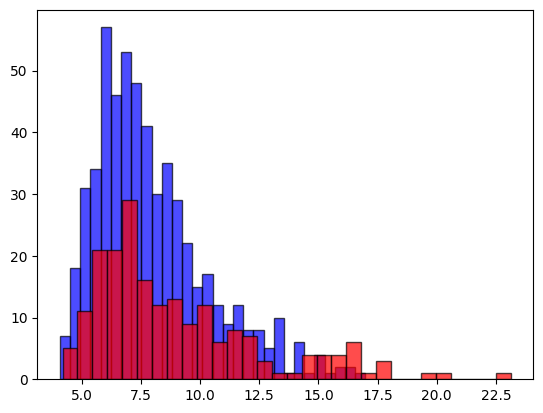

In [39]:
#Plotando Histogramas referentes ao Volume autorizado para espécies Ipe Roxo e Amarelo, que são duas espécies com alto valor comercial

plt.hist(ipe_amarelo['VOLUME_AUTORIZADO'], bins=30, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_AUTORIZADO'], bins=30, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

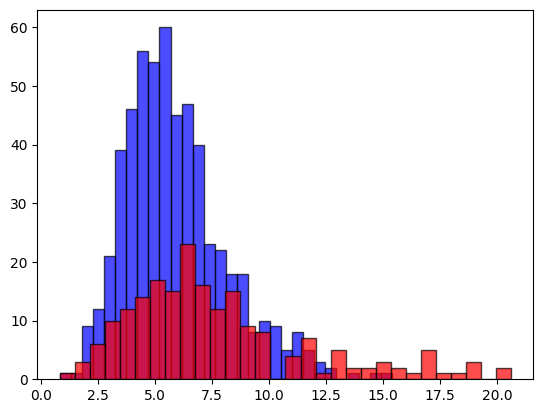

In [40]:
#Plotando Histogramas referentes ao Volume Explorado das Espécies com 30 bins

plt.hist(ipe_amarelo['VOLUME_EXPLORADO'], bins=30, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_EXPLORADO'], bins=30, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

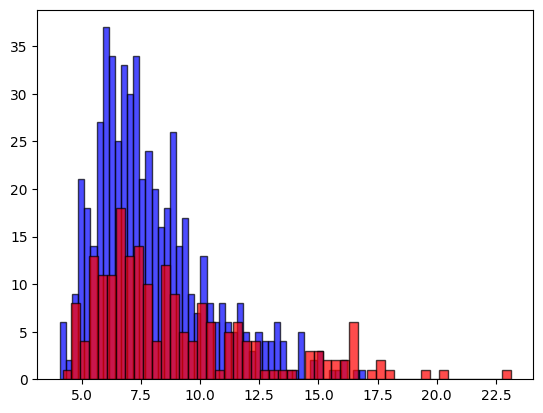

In [41]:
#Plotando Histogramas referentes ao Volume autorizado das Espécie com 50 bins

plt.hist(ipe_amarelo['VOLUME_AUTORIZADO'], bins=50, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_AUTORIZADO'], bins=50, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

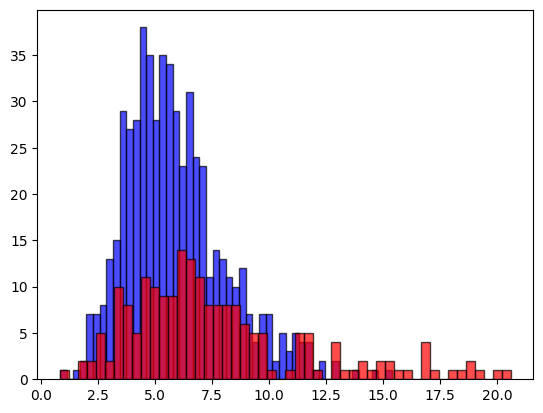

In [42]:
#Plotando Histogramas referentes ao Volume Explorado da Espécie com 50 bins

plt.hist(ipe_amarelo['VOLUME_EXPLORADO'], bins=50, label='True', color='blue', edgecolor='black', alpha = 0.7)
plt.hist(ipe_roxo['VOLUME_EXPLORADO'], bins=50, label='True', color='red', edgecolor='black', alpha = 0.7)
plt.show()

## Atividade 2

Calcular o Z-score onde um projeto é escolhido ao acaso e este tem volume liberado de Ipê Amarelo menor do que 10 m3.

Z score é calculado conforme a formula abaixo

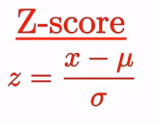

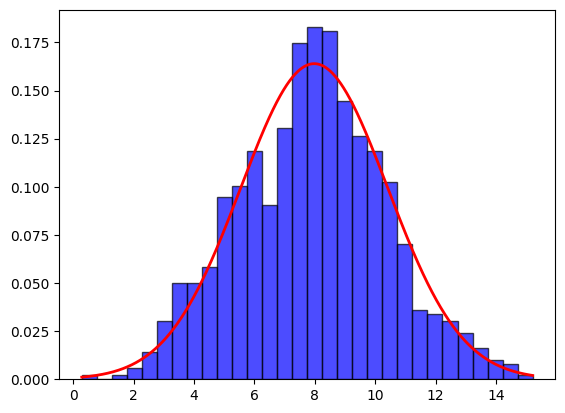

In [247]:
#Criando cópia dos dados para Ipê amarelo

data_ipe_amarelo = ipe_amarelo['VOLUME_AUTORIZADO'].copy()


#Calculando a média e o desvio padrão estimados
mu_ipe_amarelo, sigma_ipe_amarelo = stats.norm.fit(data_ipe_amarelo)

#criado dados artificiais
artificial_ipe_amarelo = np.random.normal(mu_ipe_amarelo, sigma_ipe_amarelo,1000)


#Calculando parametros da distribuição
pdf_ipe_amarelo = stats.norm.pdf(artificial_ipe_amarelo, mu_ipe_amarelo, sigma_ipe_amarelo)
distribuicao = np.linspace(artificial_ipe_amarelo.min(), artificial_ipe_amarelo.max(), 1000)


#Plotando histograma
plt.hist(artificial_ipe_amarelo, bins=30, label='True', color='blue', edgecolor='black', alpha = 0.7, zorder=1, density=True)
plt.plot(distribuicao,stats.norm.pdf(distribuicao, mu_ipe_amarelo, sigma_ipe_amarelo),   'r-', lw=2, zorder=2)
plt.show()

**Tabela Z para calculo dos scores**

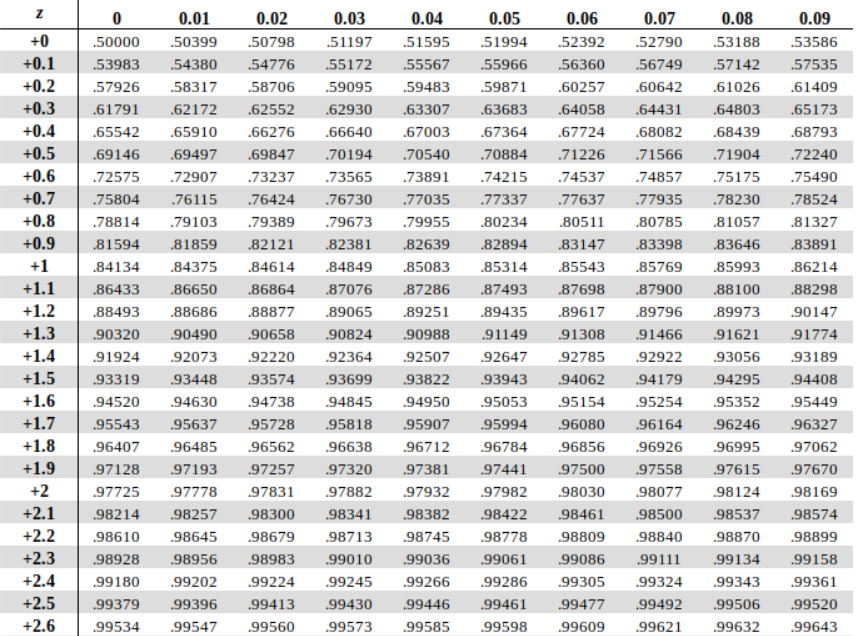

In [123]:
x = 10

z = (x - mu_ipe_amarelo)/sigma_ipe_amarelo
print(artificial_ipe_amarelo.mean())
print(mu_ipe_amarelo)
print(z)


8.048992591174583
7.9781120353982296
0.8310055334370705


**Ou Seja, em uma distribuição aleatória, a chance de um projeto possuir menos de 10m3 de Ipê-Amarelo autorizado é de 79,67%**

## Atividade 3


Equação


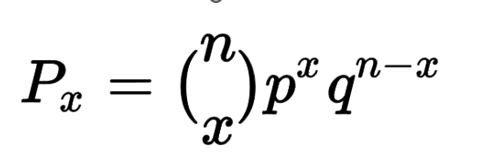

In [60]:
def fatorial(x):
  if x == 0:
    return 1
  else:
    return x * fatorial(x-1)
def combinacao (n, x):
  return fatorial(n) / (fatorial(x) * fatorial(n-x))
def binomial (n, x, p):
  return combinacao(n, x) * (p**x) * ((1-p)**(n-x))

In [79]:
binomial(50,48,0.8)

0.001092736514728003

Relizando o Calculo e o Gráfico utilizando o numpy e Stats

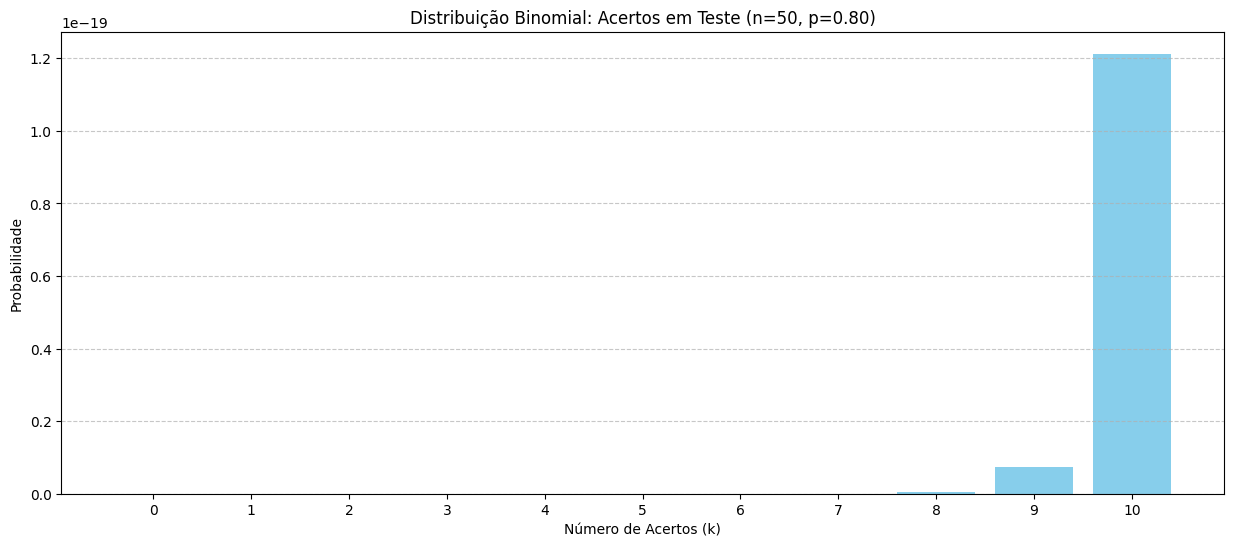

In [248]:
n = 50
k = np.arange(0, 11, 1) #10 primeiros
s = 0.80


probabilidades = stats.binom.pmf(k, n, s)


plt.figure(figsize=(15, 6))
plt.bar(k, probabilidades, color='skyblue')
plt.title('Distribuição Binomial: Acertos em Teste (n=50, p=0.80)')
plt.xlabel('Número de Acertos (k)')
plt.ylabel('Probabilidade')
plt.xticks(k)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Part 2

## A:Sample Distribution

O experimento proposto é de se escolhermos um projeto ao acaso, qual a propabilidade deste possuir mais 8m3 autorizados para exploração.

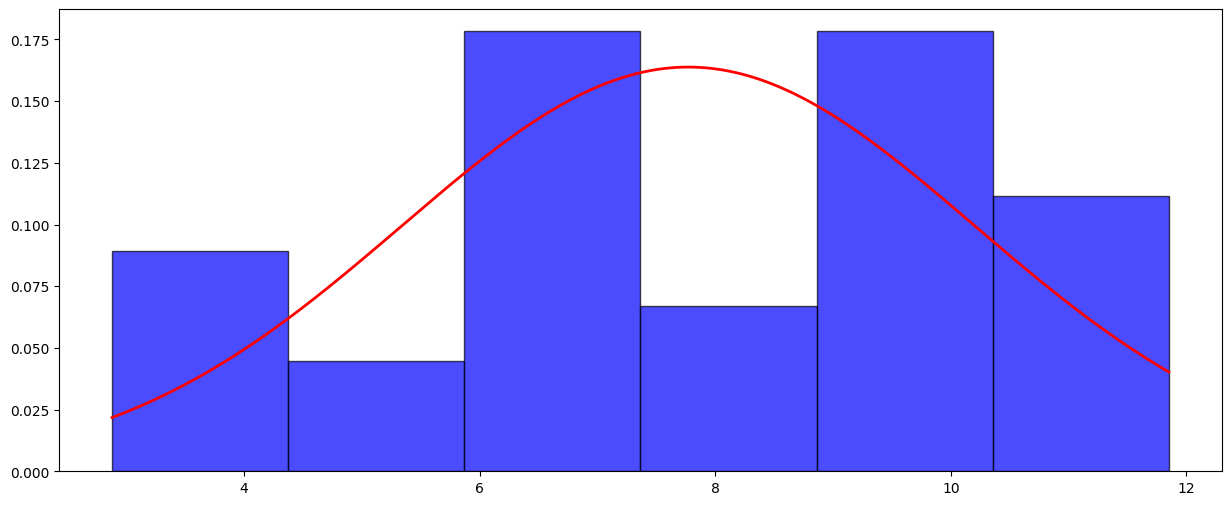

In [195]:
artificial_population_ipe_amarelo = np.random.normal(mu_ipe_amarelo, sigma_ipe_amarelo,1000)

mu_artificial_ipe_amarelo, sigma_artificial_ipe_amarelo = stats.norm.fit(artificial_population_ipe_amarelo)

sample_size = 30

sample_artificial_population_ipe_amarelo = np.random.choice(artificial_population_ipe_amarelo, size=sample_size,replace=False)

sample_distribuicao = np.linspace(sample_artificial_population_ipe_amarelo.min(), sample_artificial_population_ipe_amarelo.max(), 1000)

pdf_sample_ipe_amarelo = stats.norm.pdf(sample_distribuicao,mu_artificial_ipe_amarelo,sigma_artificial_ipe_amarelo)
plt.figure(figsize=(15,6))

plt.hist(sample_artificial_population_ipe_amarelo, bins='auto', label='True', color='blue', edgecolor='black', alpha = 0.7, zorder=1, density=True)

plt.plot(sample_distribuicao,pdf_sample_ipe_amarelo,   'r-', lw=2, zorder=2)

plt.show()

Conforme a tabela z cointida na atividade 2 existe 53,5% de um projeto escolhido ao acaso ter volume autorizado menos que 8m3

In [249]:
x = 8

z = (x - mu_artificial_ipe_amarelo)/sigma_artificial_ipe_amarelo
print(z)


0.09386591034243312


## B: TLC

**GAMA PARA 10 AMOSTRAS**

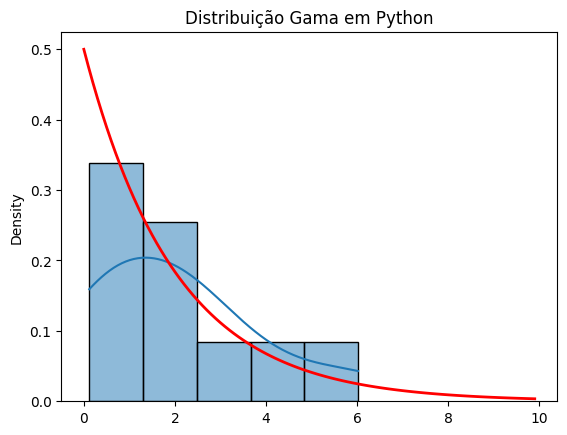

In [204]:
amostras = stats.gamma.rvs(a=1, scale=2, size=10, random_state=42)
sns.histplot(amostras, kde=True, stat='density')
x = [i/10 for i in range(100)]
plt.plot(x, stats.gamma.pdf(x, a=1, scale=2), 'r-', lw=2)
plt.title("Distribuição Gama em Python 10 Amostras")
plt.show()

**GAMA PARA 100 AMOSTRAS**

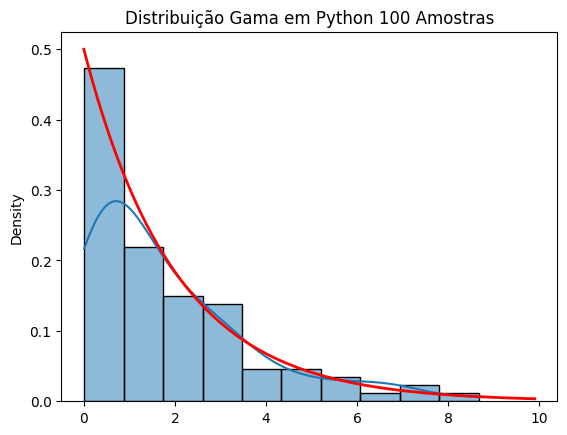

In [207]:
amostras = stats.gamma.rvs(a=1, scale=2, size=100, random_state=42)
sns.histplot(amostras, kde=True, stat='density')
x = [i/10 for i in range(100)]
plt.plot(x, stats.gamma.pdf(x, a=1, scale=2), 'r-', lw=2)
plt.title("Distribuição Gama em Python 100 Amostras")
plt.show()

**GAMA PARA 10000 AMOSTRAS**

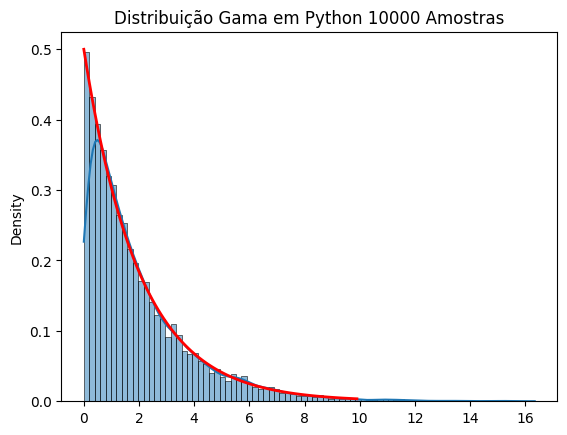

In [208]:
amostras = stats.gamma.rvs(a=1, scale=2, size=10000, random_state=42)
sns.histplot(amostras, kde=True, stat='density')
x = [i/10 for i in range(100)]
plt.plot(x, stats.gamma.pdf(x, a=1, scale=2), 'r-', lw=2)
plt.title("Distribuição Gama em Python 10000 Amostras")
plt.show()

## C: Moedas


Pelo principio fundamental da contagem temos que o numero de eventos possíveis é 2 (cara e coroa), como os eventos são independentes entre si, multiplicamos os eventos, de modo que facilmente podemos entender que o total de eventos possiveis é 2^n onde n é o número de moedas lançadas.

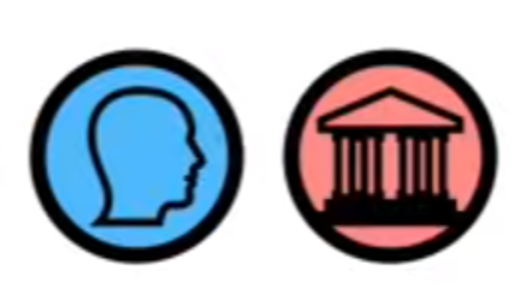

In [216]:
def total_moedas(n):
  return 2**n

Como para este evento a ordem em que saem o número esperado de coroas não importa, mas sim o numero de coroas tiradas, podemos então considerar que os eventos esperados como uma combinação sem repetição. Conforme abaixo, os eventos abaixo todos satisfazem a condição de tirar uma coroa, ou seja, existem 5 eventos possiveis com **exatamente** uma coroa.


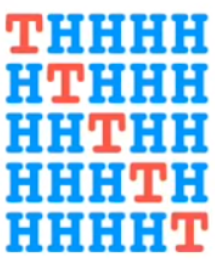

A combinação é calculada conforme abaixo:

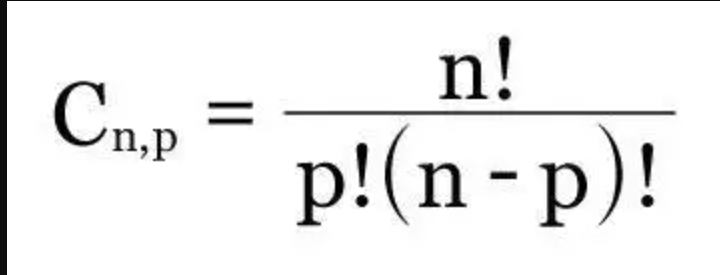

A função relativa a combinação é a mesma implementada no problema 3 da parte 1 desta atividade.

In [209]:
numero_de_moedas = 5
numero_de_coroas = 1

combinacao(numero_de_moedas,numero_de_coroas)

5.0

Para calcular o p valor temos que somar a probabilidade de ocorrer o evento esperado, o evento simetrico e os mais raros que o esperado e o simetrico.

O evento simetrico de 1 coroa seria a ocorrencia de 4 coroas(ou 1 cara).
Neste caso os eventos mais raros seriam 5 coroas ou nenhuma coroa.

In [218]:
numero_de_moedas = 5
numero_de_coroas = 1

evento_a = combinacao(numero_de_moedas,numero_de_coroas)


numero_de_coroas = 0

evento_b = combinacao(numero_de_moedas,numero_de_coroas)


numero_de_coroas = 4

evento_c = combinacao(numero_de_moedas,numero_de_coroas)

numero_de_coroas = 5

evento_d = combinacao(numero_de_moedas,numero_de_coroas)



Conforme abaixo, o p valor será os eventos esperados, simetricos e mais raros divididos pelo total de eventos

In [219]:
p_valor = (evento_a + evento_b + evento_c + evento_d)/total_moedas(5)

print(p_valor)

0.375


# D:P Value

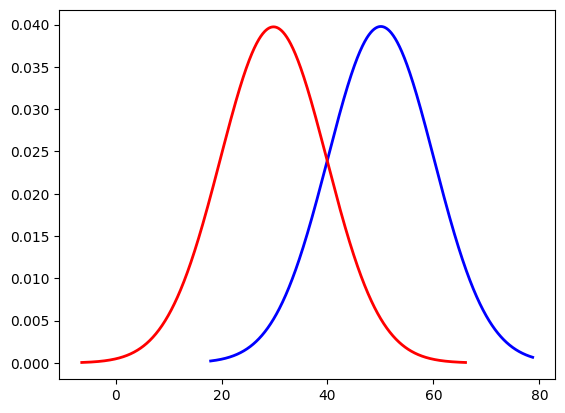

In [228]:
#Criando distribuição aleatórias
distro_a = np.random.normal(loc = 50, scale = 10, size = 1000)
distro_b = np.random.normal(loc = 30, scale = 10, size = 1000)
#Calculando os parametros da média(mu) e desvio padrão(sigma)
mu_a, sigma_a = stats.norm.fit(distro_a)
mu_b, sigma_b = stats.norm.fit(distro_b)

x = np.linspace(distro_a.min(), distro_a.max(), 1000)
y = np.linspace(distro_b.min(), distro_b.max(), 1000)

#plotando os gráficos
plt.plot(x,stats.norm.pdf(x, mu_a, sigma_a),   'b-', lw=2, zorder=1)
plt.plot(y,stats.norm.pdf(y, mu_b, sigma_b),   'r-', lw=2, zorder=2)

plt.show()

In [245]:
#calculando p values e testando.
num_sequencias = 100
sequencias_comprimento = 3
distro_a_samples = [np.random.normal(loc=mu_a, scale=sigma_a, size=sequencias_comprimento) for _ in range(num_sequencias)]

distro_a_samples = []

for _ in range(num_sequencias):
    sample = np.random.normal(loc=mu_a, scale=sigma_a, size=sequencias_comprimento)
    distro_a_samples.append(sample)
p_values_b = []

for sequence in distro_a_samples:
    t_statistic, p_value = stats.ttest_ind(sequence, distro_b)
    p_values_b.append(p_value)

falso_negativo = 0
for p_value in p_values:
  if p_value > 0.05:
    falso_negativo+=1

falso_negativo

6